Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: colorspace

Loading required package: khroma

Loading required package: ggplot2

Loading required package: ggpattern

Loading required package: reshape2

Loading required package: tidyverse

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_confl

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

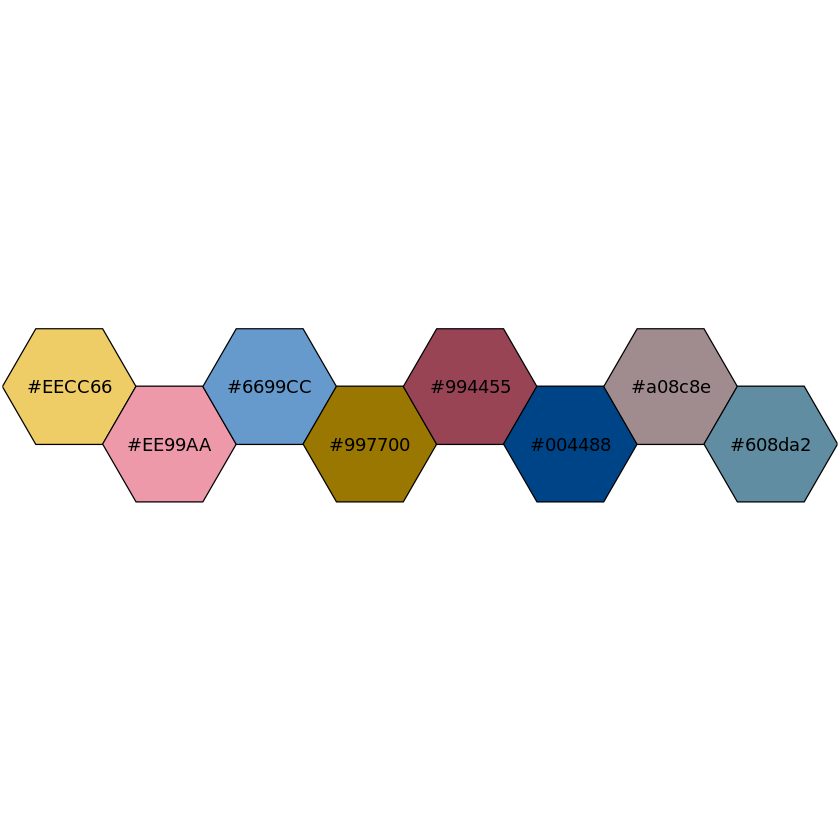

In [1]:
f_func <- "../functions.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_func, '--to=script', '--stdout'), stdout = TRUE)))
f_path <- "../dirs.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_path, '--to=script', '--stdout'), stdout = TRUE)))
f_cols <- "../cols.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_cols, '--to=script', '--stdout'), stdout = TRUE)))

In [2]:
LOSD_genus_table_withNoise <- readRDS(paste0(INT_LOSD, "LOSD_genus_table_withNoise.Rdata"))
LOSD_species_table_withNoise <- readRDS(paste0(INT_LOSD, "LOSD_species_table_withNoise.Rdata"))

In [3]:
options(repr.plot.width=15, repr.plot.height=10)
suppl9_plot_LOSD <- list()
for (j in 1:2){
    LOSD_withNoise <- list(LOSD_species_table_withNoise, LOSD_genus_table_withNoise)[[j]] %>% 
        melt(id.vars = colnames(.)[!grepl(colnames(.), pattern = "LOSD")], value.name = "LOSD", variable.name = "control_set") %>%
        mutate(M_reads = as.numeric(gsub(control_set, pattern = "[^0-9.-]+", replacement = ""))) %>% 
        mutate(strain = gsub(strain, pattern = "(?<=[a-z])(?=[A-Z])", replacement = " ", perl = TRUE))  %>% 
        filter(M_reads == 70) %>% 
        mutate(M_reads = paste0(M_reads, "M reads")) %>% 
        mutate(control = ifelse(grepl(control_set, pattern = "Bctrls"), yes = "BAL ss-cfDNA", 
                         ifelse(grepl(control_set, pattern = "Pctrls"), yes = "plasma ss-cfDNA", no = NA))) %>% 
        mutate(LOSD = factor(LOSD, levels = c(0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,">4096"))) %>% 
        mutate(strain = gsub(strain, pattern = "Aspergillus", replacement = "Aspergillus ")) %>%  
        mutate(db = factor(db, levels = c("EPRSc2", "EPRSFv64MCAspDM"))) %>% 
        mutate(db = ifelse(db == "EPRSc2", yes = "cRE.21", no = as.character(db))) %>% 
        mutate(db = ifelse(db == "EPRSFv64MCAspDM", yes = "dREM.260", no = as.character(db))) %>% 
        filter(control %in% c("plasma ss-cfDNA", "BAL ss-cfDNA")) 
    if (j == 1){LOSD_withNoise <- LOSD_withNoise %>% filter(db == "cRE.21")}
    if (j == 2){LOSD_withNoise <- LOSD_withNoise %>% filter(db == "dREM.260")}        
    
    suppl9_plot_LOSD[[j]] <- LOSD_withNoise %>% 
        mutate(control = factor(control, levels = c("plasma ss-cfDNA", "BAL ss-cfDNA"))) %>% 
        ggplot(aes(x=threshold, y=strain, fill = LOSD)) + 
            geom_tile(col = "black",linewidth = 0.1) + 
            facet_grid(cols = vars(control), scale = "free", space = "free_y") + 
            theme_bw() + 
            theme(strip.background=element_rect(fill="white", color = "white"), 
                axis.text.x=element_text(angle=90, hjust=1, vjust = 0.5)) +
            guides(color = guide_legend(override.aes = list(fill = NA)),
                linetype = guide_legend(override.aes = list(fill = NA))) +
            scale_fill_manual(drop = FALSE, na.value = "black", 
                              breaks = rev(c(0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,">4096")), 
                              values = c(colors_mc[7], browns(5)[1:4], reds(7)[2:7], blues(6)[1:5])) + 
            labs(y = "", x = "confidence threshold", 
                fill = "minimal MPM", color = "") + 
                scale_y_discrete(limits=rev)  
}

In [4]:
cRE.21_only <- LOSD_species_table_withNoise %>% 
    melt(id.vars = colnames(.)[!grepl(colnames(.), pattern = "LOSD")], value.name = "LOSD", variable.name = "control_set") %>%
    mutate(db = ifelse(db == "EPRSc2", yes = "cRE.21", no = as.character(db))) %>% 
    mutate(db = ifelse(db == "EPRSFv64MCAspDM", yes = "dREM.260", no = as.character(db))) %>% 
    filter(db == "cRE.21")

db_comparison_S <- LOSD_species_table_withNoise  %>% 
    melt(id.vars = colnames(.)[!grepl(colnames(.), pattern = "LOSD")], value.name = "LOSD", variable.name = "control_set") %>%
    mutate(M_reads = as.numeric(gsub(control_set, pattern = "[^0-9.-]+", replacement = ""))) %>% 
    filter(M_reads == 70) %>% 
    filter(strain %in% unique(cRE.21_only$strain)) %>% 
    select(-strain) %>% 
    mutate(sample = ifelse(grepl(control_set, pattern = "_Bctrls"), yes = 'BAL ss-cfDNA', 
                    ifelse(grepl(control_set, pattern = "_Pctrls"), yes = 'plasma ss-cfDNA', NA))) %>% 
    mutate(sample = factor(sample, levels = c('plasma ss-cfDNA', 'BAL ss-cfDNA'))) %>% 
    group_by(LOSD, db, threshold, sample) %>% 
    summarise(n = n(), .groups = "keep") %>% 
    mutate(MPM = factor(LOSD, levels = rev(c(0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,">4096"))))  %>% 
    mutate(db = ifelse(db == "EPRSc2", yes = "cRE.21", no = as.character(db))) %>% 
    mutate(db = ifelse(db == "EPRSFv64MCAspDM", yes = "dREM.260", no = as.character(db))) %>% 
    filter(db %in% c("cRE.21", "dREM.260")) %>% 
    ggplot(aes(x = threshold, y = n, fill = MPM)) + 
        geom_col(position = "fill") +
        scale_fill_manual(drop = FALSE, na.value = "black", 
                          breaks = rev(c(0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,">4096")), 
                          values = c(colors_mc[7], browns(5)[1:4], reds(7)[2:7], blues(6)[1:5])) + 
        guides(color = guide_legend(override.aes = list(fill = NA)),
        linetype = guide_legend(override.aes = list(fill = NA))) +
        #scale_color_manual(values = c("BAL ss-cfDNA" = "darkgrey", "plasma ss-cfDNA" = "black")) +
        #scale_y_continuous(breaks=c(0,seq(5, 55, 10))) +
        theme_bw() + theme(legend.key = element_rect(fill = "white")) +
        ylab("Fraction Aspergillus simulations") + 
        facet_grid(rows = vars(db), cols = vars(sample), scales = "free_x") + xlab("confidence threshold") + 
        labs(fill = "Molecules\nPer\nMillion (MPM)") 

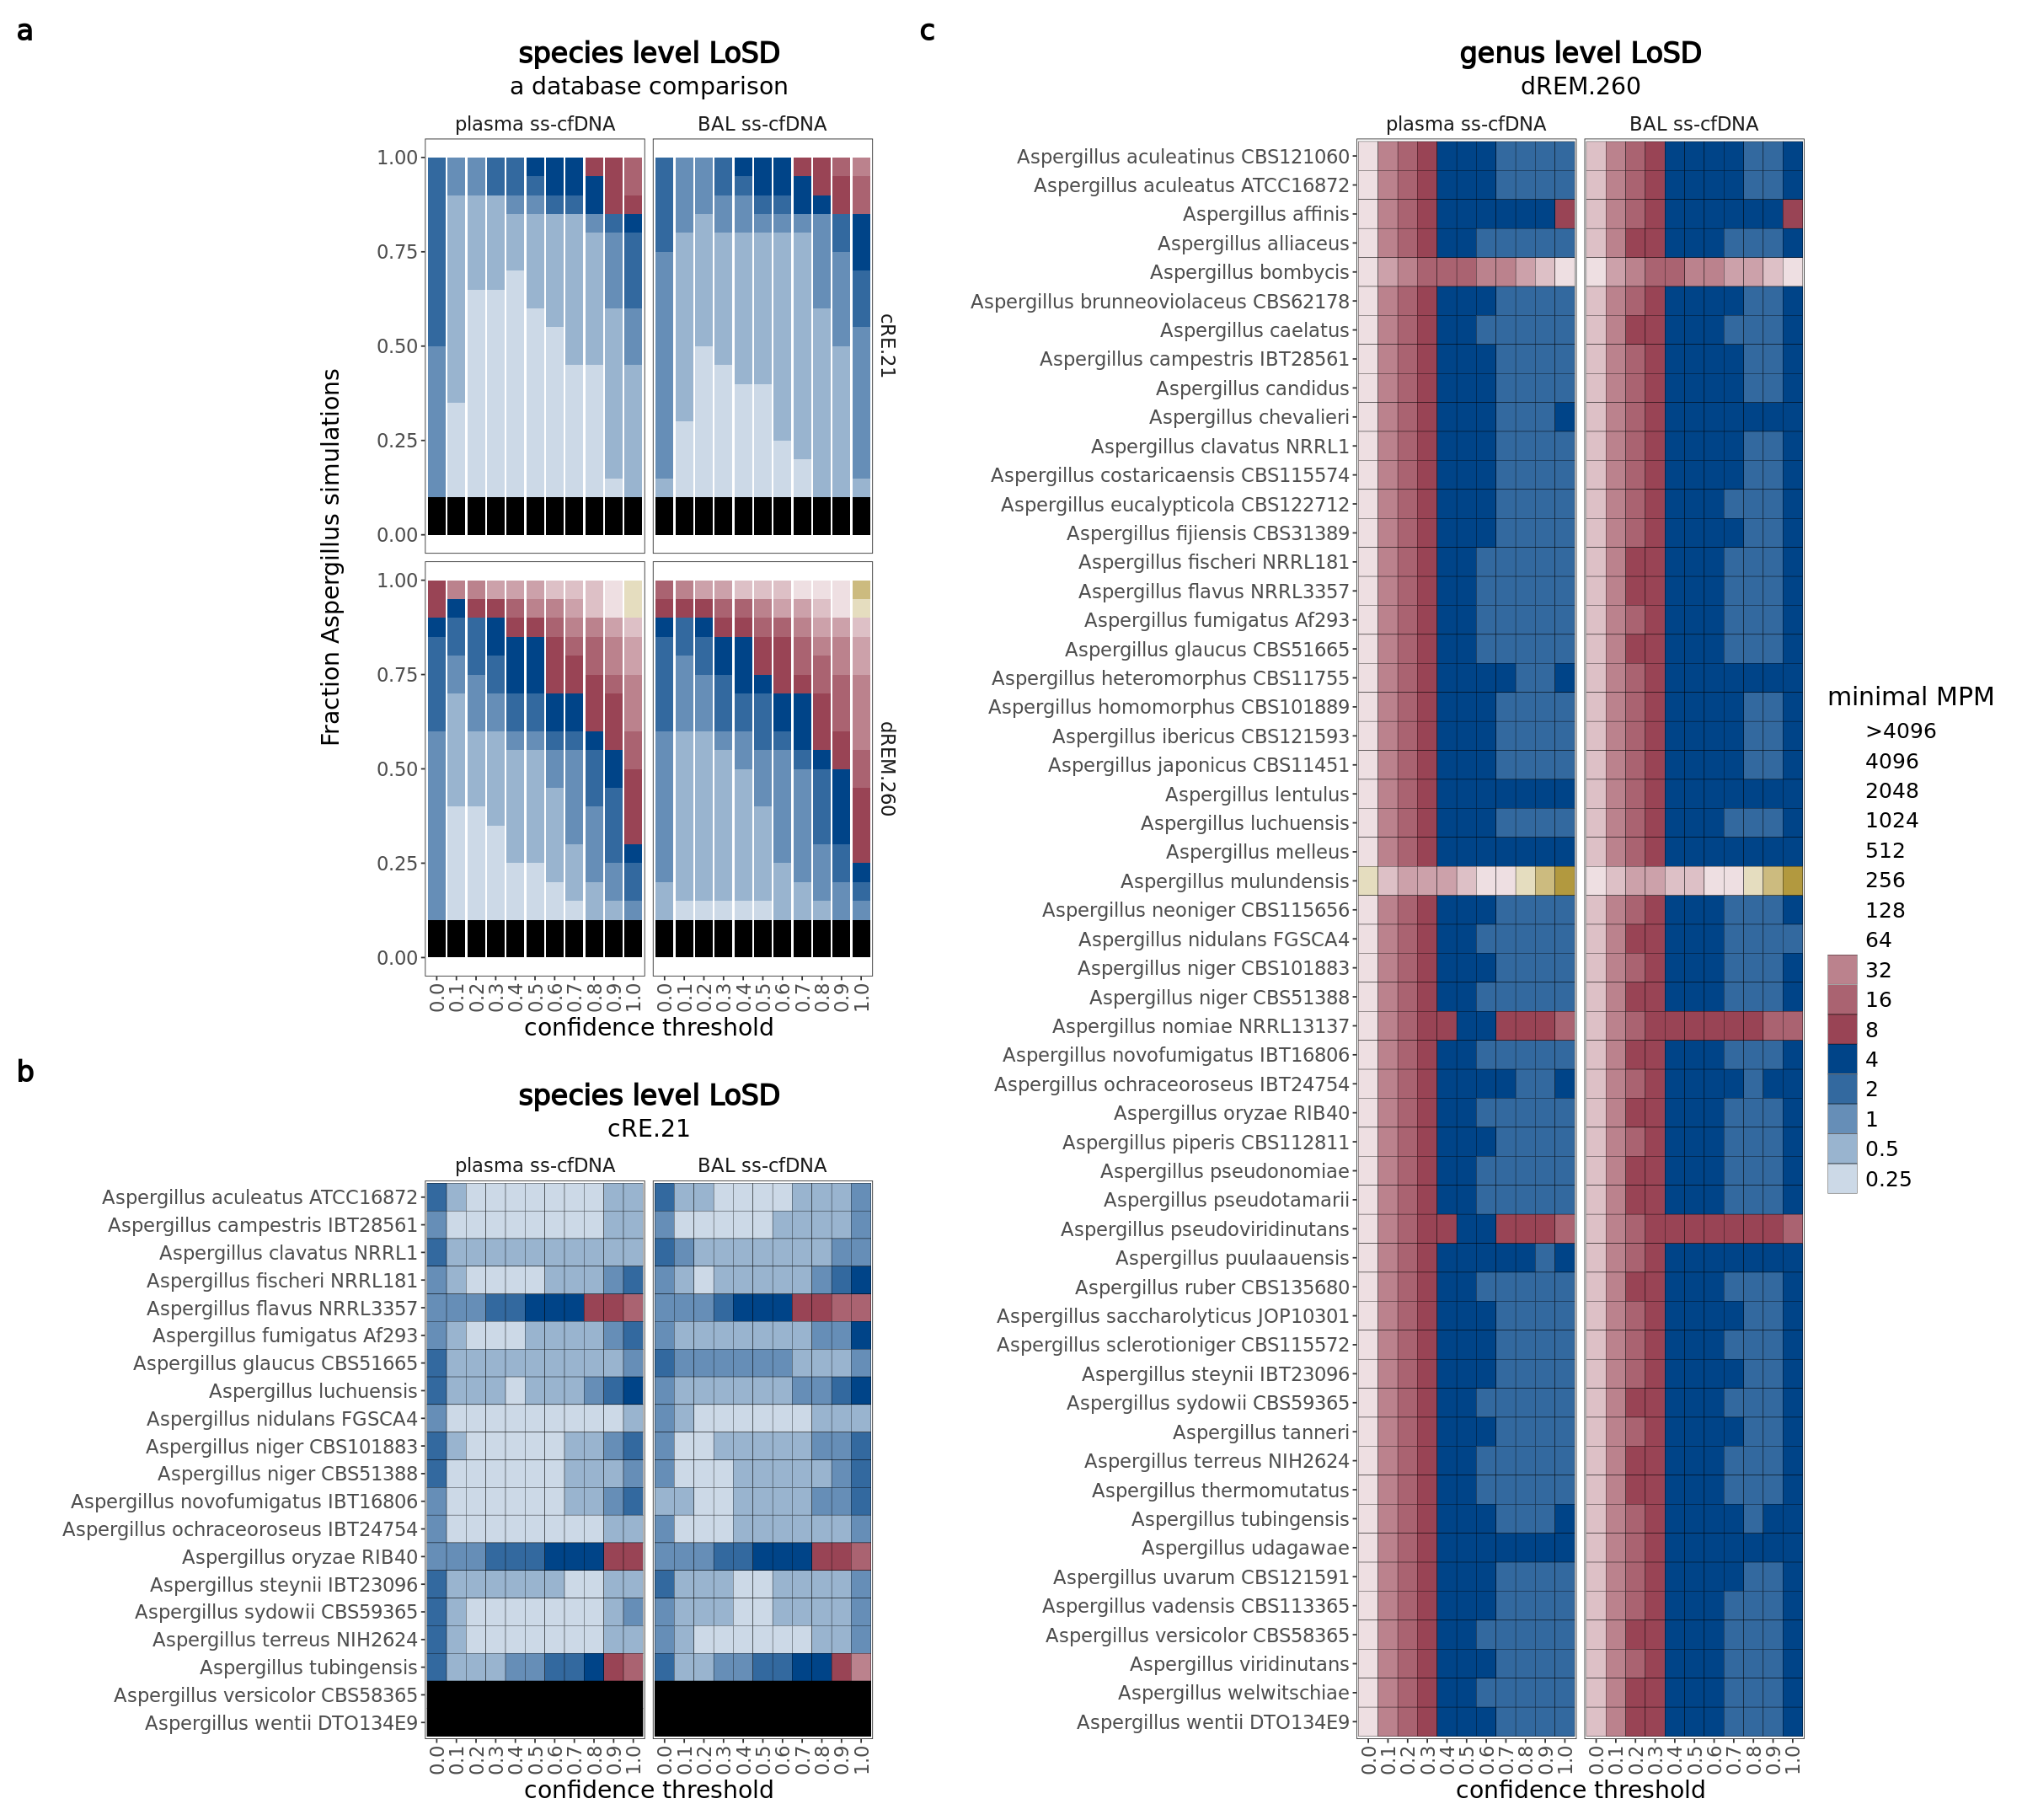

In [5]:
options(repr.plot.width=20, repr.plot.height=18)
layout <- "
    AC
    BC
"
SuplFig9 <- 
    (db_comparison_S + labs(tag = "a") + guides(fill = "none", color = "none") + 
         ggtitle(label = "species level LoSD", subtitle = "a database comparison")) + 
    (suppl9_plot_LOSD[[1]] + labs(tag = "b") + guides(color = "none") + 
         ggtitle(label = c("species level LoSD"), subtitle = "cRE.21")) + 
    (suppl9_plot_LOSD[[2]] + labs(tag = "c") + guides(fill = "none", color = "none") + 
         ggtitle(label = c("genus level LoSD"), subtitle = "dREM.260")) +
        plot_layout(design = layout, guides = "collect", heights = c(1.5,1)) &
        theme(axis.title.y = element_text(vjust = -50), 
            legend.position='right', legend.justification='right', legend.direction = 'vertical',
            axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
            legend.key.size = unit(0.75, 'cm'), legend.key.height = unit(0.75, 'cm'), legend.key.width = unit(0.75, 'cm'), 
            text = element_text(size = 17), 
            legend.title = element_text(size = 18), legend.text = element_text(size = 15, colour = "black"),
            plot.title = element_text(size = 20, hjust = 0.5, face = "bold"), 
            plot.subtitle = element_text(size = 17, hjust = 0.5), 
            plot.tag = element_text(face = 'bold', size = 20),  
            strip.background = element_blank(), 
            panel.grid.major = element_blank(), panel.grid.minor = element_blank())

SuplFig9

ggsave("../../output/suppl_figures/SuplFig9_R.png", 
       SuplFig9, width = 20, height = 18)
ggsave("../../output/suppl_figures/SuplFig9_R.pdf", 
       SuplFig9, width = 20, height = 18)